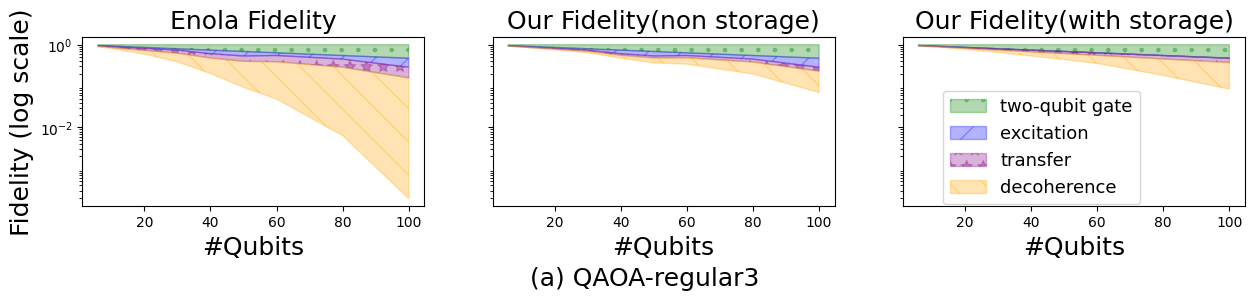

In [1]:
# Figure 7(a)

import matplotlib.pyplot as plt
import numpy as np

with open('data/qaoa_regular3_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())
    mvqc_runtime = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())
    enola_runtime = eval(file.readline())

with open('data/qaoa_regular3_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)
plt.figtext(0.5, -0.22, '(a) QAOA-regular3', ha='center', va='center', fontsize=18)
fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.savefig("fig/qaoa-regular3.pdf",  bbox_inches='tight')
plt.show()

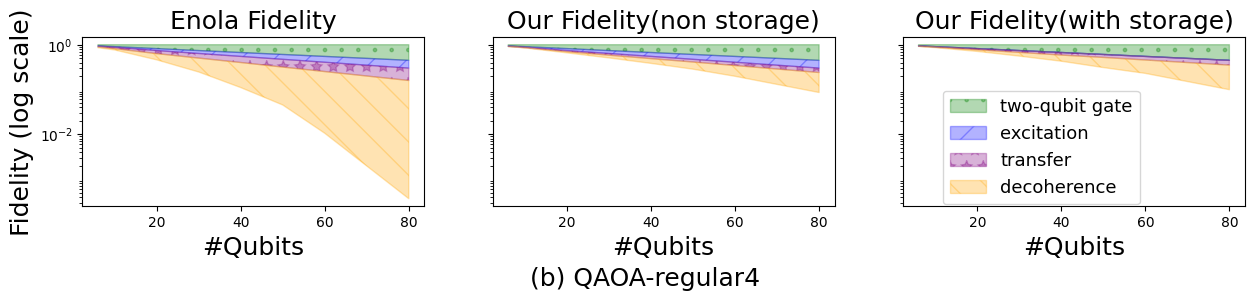

In [2]:
# Figure 7(b)

import matplotlib.pyplot as plt
import numpy as np

with open('data/qaoa_regular4_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())
    mvqc_runtime = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())
    enola_runtime = eval(file.readline())

with open('data/qaoa_regular4_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)
plt.figtext(0.5, -0.22, '(b) QAOA-regular4', ha='center', va='center', fontsize=18)
fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.savefig("fig/qaoa-regular4.pdf",  bbox_inches='tight')
plt.show()

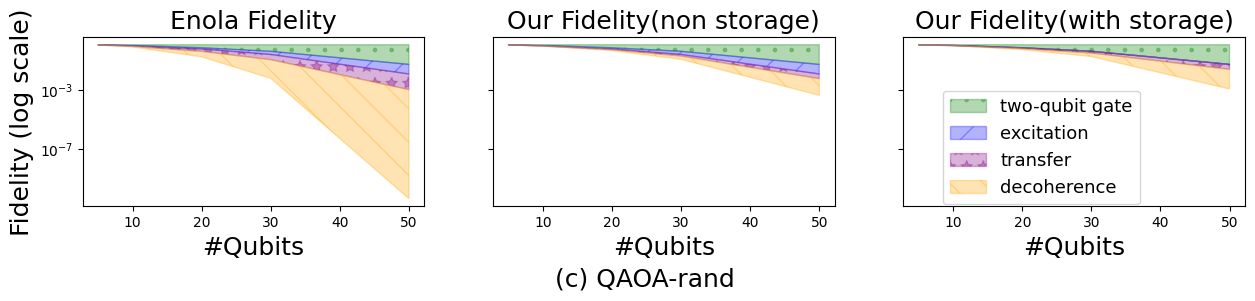

In [3]:
# Figure 7(c)

import matplotlib.pyplot as plt
import numpy as np

with open('data/qaoa_random_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())
    mvqc_runtime = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())
    enola_runtime = eval(file.readline())

with open('data/qaoa_random_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)
plt.figtext(0.5, -0.22, '(c) QAOA-rand', ha='center', va='center', fontsize=18)
fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.savefig("fig/qaoa-rand.pdf",  bbox_inches='tight')
plt.show()

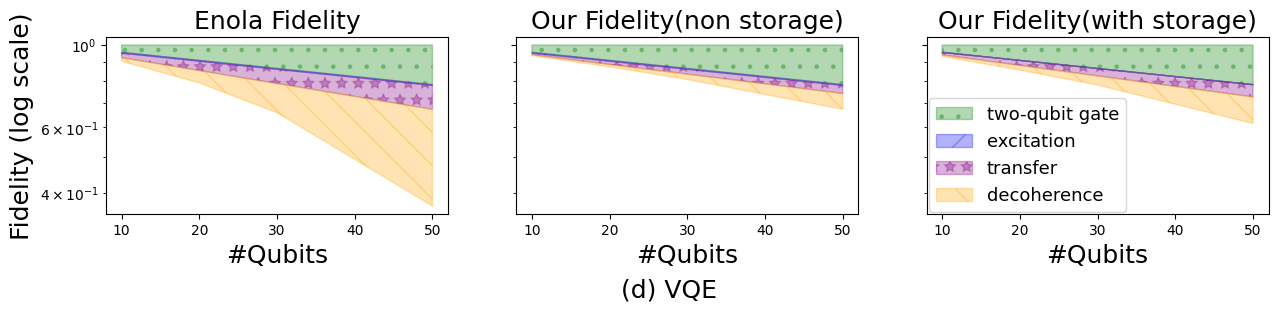

In [4]:
# Figure 7(d)

import matplotlib.pyplot as plt
import numpy as np

with open('data/vqe_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())
    mvqc_runtime = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())
    enola_runtime = eval(file.readline())

with open('data/vqe_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.3))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=1))

ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=1))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=1))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)
plt.figtext(0.5, -0.22, '(d) VQE', ha='center', va='center', fontsize=18)
fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.805, 0.12), borderaxespad=0.)

plt.savefig("fig/vqe.pdf",  bbox_inches='tight')
plt.show()

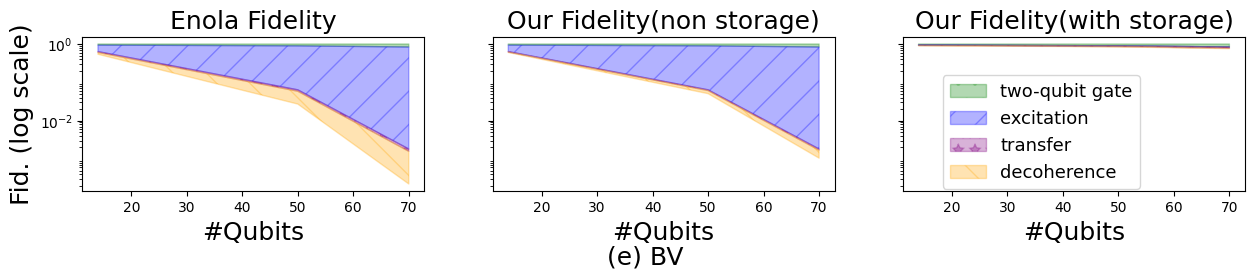

In [5]:
# Figure 7(e)

import matplotlib.pyplot as plt
import numpy as np

with open('data/bv_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())
    mvqc_runtime = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())
    enola_runtime = eval(file.readline())

with open('data/bv_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fid. (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)

fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.figtext(0.5, -0.22, '(e) BV', ha='center', va='center', fontsize=18)
plt.savefig("fig/bv.pdf",  bbox_inches='tight')

plt.show()


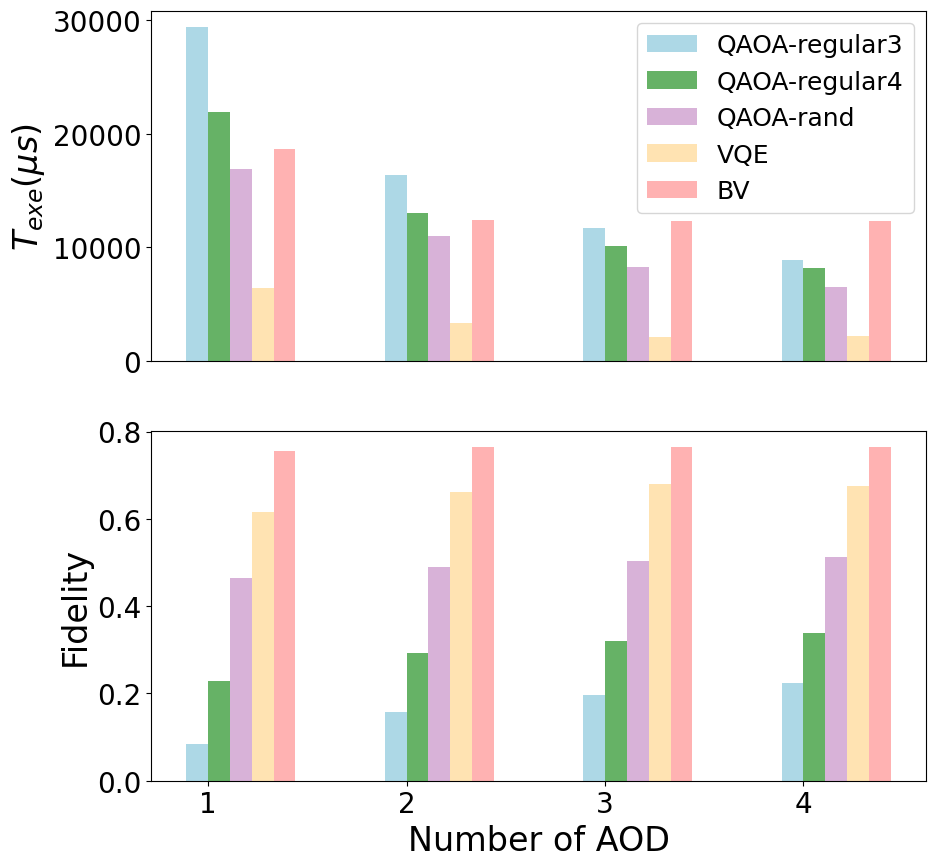

In [6]:
# Figure 11

mvqc_data = {}
benchmark_tags = ['qaoa_regular3', 'qaoa_regular4', 'qaoa_random', 'vqe', 'bv']
tags = ['qaoa_regular3_100', 'qaoa_regular4_60', 'qaoa_random_20', 'vqe_50', 'bv_70']
NAOD_list = [1, 2, 3, 4]
for NAOD in NAOD_list:
    mvqc_data[NAOD] = {}
for tag in benchmark_tags:
    with open('data/' + tag + "_storage_compare_multi_aod.txt", 'r') as file:
        NAOD_list = eval(file.readline())
        for NAOD in NAOD_list:
            
            N_Qubit_List = eval(file.readline())
            mvqc_transfer_duration_list = eval(file.readline()) 
            mvqc_move_duration_list = eval(file.readline()) 
            mvqc_cir_fidelity_list = eval(file.readline()) 
            mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
            mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
            mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
            mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
            mvqc_cir_fidelity_coherence_list = eval(file.readline())
            mvqc_nmoves = eval(file.readline())
            for i in range(len(N_Qubit_List)):
                if tag + '_' + str(N_Qubit_List[i]) in tags:
                    mvqc_data[NAOD][tag + '_' + str(N_Qubit_List[i])] = (mvqc_move_duration_list[i] + mvqc_transfer_duration_list[i], mvqc_cir_fidelity_list[i])

import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10)) 
categories = NAOD_list

data_list = {}

for ti in range(len(tags)):
    data_list[ti] = []
    for c in categories:
        data_list[ti].append(mvqc_data[c][tags[ti]][0])

bar_width = 0.55
index = np.arange(len(categories)) * 5

ax1.bar(index, data_list[0], bar_width, label='QAOA-regular3', color = 'lightblue')
ax1.bar(index + bar_width, data_list[1], bar_width, label='QAOA-regular4', color = 'green', alpha = 0.6)
ax1.bar(index + 2 * bar_width, data_list[2], bar_width, label='QAOA-rand', color = 'purple', alpha = 0.3)
ax1.bar(index + 3 * bar_width, data_list[3], bar_width, label='VQE', color = 'orange', alpha = 0.3)
ax1.bar(index + 4 * bar_width, data_list[4], bar_width, label='BV', color = 'red', alpha = 0.3)

ax1.set_ylabel(r'$T_{exe} (\mu s)$', fontsize = 24)
ax1.set_xticks([])
ax1.legend(fontsize = 18)

categories = NAOD_list

data_list = {}

for ti in range(len(tags)):
    data_list[ti] = []
    for c in categories:
        data_list[ti].append(mvqc_data[c][tags[ti]][1])

bar_width = 0.55
index = np.arange(len(categories)) * 5
ax2.bar(index, data_list[0], bar_width, label='QAOA-regular3', color = 'lightblue')
ax2.bar(index + bar_width, data_list[1], bar_width, label='QAOA-regular4', color = 'green', alpha = 0.6)
ax2.bar(index + 2 * bar_width, data_list[2], bar_width, label='QAOA-rand', color = 'purple', alpha = 0.3)
ax2.bar(index + 3 * bar_width, data_list[3], bar_width, label='VQE', color = 'orange', alpha = 0.3)
ax2.bar(index + 4 * bar_width, data_list[4], bar_width, label='BV', color = 'red', alpha = 0.3)

ax2.set_xlabel('Number of AOD', fontsize = 24)
ax2.set_ylabel('Fidelity', fontsize = 24)
ax2.set_xticks(index + bar_width / 2, categories, fontsize = 20)  # 设置x轴标签

ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig("fig/multi_aod.pdf",  bbox_inches='tight')
plt.subplots_adjust(hspace=0.2) 